## Classifying Forest Cover in Northern Colorado

### Problem:

Classifying characteristics of wilderness areas is an important step to the management of private, state or federal lands.$^{[1]}$ Getting such information can provide insights which can assist in land development, assesing risks, or conservation efforts.$^{[2]}$ Usually, land is classified manually using either field personnel or through remote sensing. However, this can prove to be both time consuming and costly, or can be very difficult/impossible to acheive due to location.$^{[1]}$ To potentially alleviate some of the added difficulty, we can use machine learning in order to classify forest land cover type based on cartographic features.

### Data Description:

Forest cover type is the type of tree cover an area of land has - in this particular study, it will either be Spruce/Fir, Lodgepole Pine, Ponderosa Pine, Cottonwood Willow, Aspen, Douglas-fir, or Krummholz. The data for this project was taken from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Covertype). This data was taken from four different areas in Northern Colorado: Rawah Wilderness Area, Neota Wilderness Area, Comanche Wilderness Area, and Cache la Poudre Wilderness Area. It contains 


The following are the features and the target (Cover_Type) of the dataset:

| Feature | Type | Units | Description |
| ------- | ---- | ----- | ----------- |
| Elevation | quantitative | meters | Elevation in meters |
| Aspect | quantitative | azimuth | Aspect in degrees azimuth |
| Slope | quantitative | degrees | Slope in degrees |
| Horizontal_Distance_To_Hydrology | quantitative | meters | Horz Dist to nearest surface water features |
| Vertical_Distance_To_Hydrology | quantitative | meters | Vert Dist to nearest surface water features |
| Horizontal_Distance_To_Roadways | quantitative | meters | Horz Dist to nearest roadway |
| Hillshade_9am | quantitative | 0 to 255 | Hillshade index at 9am, summer solstice |
| Hillshade_Noon | quantitative | 0 to 255 | Hillshade index at noon, summer soltice |
| Hillshade_3pm | quantitative | 0 to 255 | Hillshade index at 3pm, summer solstice |
| Horizontal_Distance_To_Fire_Points | quantitative | meters | Horz Dist to nearest wildfire ignition points |
| Wilderness_Area | qualitative | binary | Wilderness area designation |
| Soil_Type | qualitative | binary | Soil Type designation |
| Cover_Type | integer | 1 to 7 | Forest Cover Type designation |

where Wilderness_Area, Soil_Type, and Cover_Type are categorical/binary features and the rest are continuous.

There are 7 different categories for cover_types for the target feature:

|   | Cover Type |
| - | ---------- |
| 1 | Spruce/Fir |
| 2 | Lodgepole Pine |
| 3 | Ponderosa Pine |
| 4 | Cottonwood/Willow |
| 5 | Aspen |
| 6 | Douglas-fir |
| 7 | Krummholz |

There are 4 different columns for Wilderness_Area:

|   | Area |
| - | ----- |
| 1 | Rawah Wilderness Area |
| 2 | Neota Wilderness Area |
| 3 | Comanche Peak Wilderness Area |
| 4 | Cache la Poudre Wilderness Area |

And 40 different columns for Soil_Type:

|   | Soil Type |
| - | --------- |
| 1	 | Cathedral family - Rock outcrop complex, extremely stony. |
| 2	 | Vanet - Ratake families complex, very stony. |
| 3	 | Haploborolis - Rock outcrop complex, rubbly. |
| 4	 | Ratake family - Rock outcrop complex, rubbly. |
| 5	 | Vanet family - Rock outcrop complex complex, rubbly. |
| 6	 | Vanet - Wetmore families - Rock outcrop complex, stony. |
| 7	 | Gothic family. |
| 8	 | Supervisor - Limber families complex. |
| 9	 | Troutville family, very stony. |
| 10 | Bullwark - Catamount families - Rock outcrop complex, rubbly. |
| 11 | Bullwark - Catamount families - Rock land complex, rubbly. |
| 12 | Legault family - Rock land complex, stony. |
| 13 | Catamount family - Rock land - Bullwark family complex, rubbly. |
| 14 | Pachic Argiborolis - Aquolis complex. |
| 15 | unspecified in the USFS Soil and ELU Survey. |
| 16 | Cryaquolis - Cryoborolis complex. |
| 17 | Gateview family - Cryaquolis complex. |
| 18 | Rogert family, very stony. |
| 19 | Typic Cryaquolis - Borohemists complex. |
| 20 | Typic Cryaquepts - Typic Cryaquolls complex. |
| 21 | Typic Cryaquolls - Leighcan family, till substratum complex. |
| 22 | Leighcan family, till substratum, extremely bouldery. |
| 23 | Leighcan family, till substratum - Typic Cryaquolls complex. |
| 24 | Leighcan family, extremely stony. |
| 25 | Leighcan family, warm, extremely stony. |
| 26 | Granile - Catamount families complex, very stony. |
| 27 | Leighcan family, warm - Rock outcrop complex, extremely stony. |
| 28 | Leighcan family - Rock outcrop complex, extremely stony. |
| 29 | Como - Legault families complex, extremely stony. |
| 30 | Como family - Rock land - Legault family complex, extremely stony. |
| 31 | Leighcan - Catamount families complex, extremely stony. |
| 32 | Catamount family - Rock outcrop - Leighcan family complex, extremely stony. |
| 33 | Leighcan - Catamount families - Rock outcrop complex, extremely stony. |
| 34 | Cryorthents - Rock land complex, extremely stony. |
| 35 | Cryumbrepts - Rock outcrop - Cryaquepts complex. |
| 36 | Bross family - Rock land - Cryumbrepts complex, extremely stony. |
| 37 | Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony. |
| 38 | Leighcan - Moran families - Cryaquolls complex, extremely stony. |
| 39 | Moran family - Cryorthents - Leighcan family complex, extremely stony. |
| 40 | Moran family - Cryorthents - Rock land complex, extremely stony. |

This gives a total of 54 features and 1 target feature. There are a total of 581012 observations with no missing values (according to the source). 

To clarify some feature data descriptions further: <ins>Hillshade</ins> is a feature which takes into account the grayscale of a 3D representation of a map. This represents the hypothetical illumination of an area. A value closer to 255 corresponds to a whiter value on the map (less shadow) while a value close to 0 corresponds to a darker value (more shadow). The <ins>Azimuth</ins> is the angular direction of the sun, measured from North in clockwise degrees (0 to 360 degrees).$^{[3],}$$^{[4]}$


---



## Data

In [1]:
# Libraries used for data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

#### Loading Data

In [2]:
# Getting column names:
col = ['Elevation',
       'Aspect',
       'Slope',
       'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways',
       'Hillshade_9am',
       'Hillshade_Noon',
       'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']
for i in range(4):
    col.append(f'Wilderness_Area_{i+1}')
for i in range(40):
    col.append(f'Soil_Type_{i+1}')
col.append('Cover_Type')
# Loading Data
cover_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz', names=col)


In [3]:
cover_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


#### Cleaning Empty and Duplicate Data

First, we wll check for empty rows, nan, and duplicated values:

In [4]:
print(f'Looking for isnull values:')
print(any(cover_df.isnull().sum()))
print(f'Looking for empty values:')
print(any((cover_df==u'').sum()))
print(f'Looking for duplicated values:')
print(any(cover_df.duplicated()))

Looking for isnull values:
False
Looking for empty values:
False
Looking for duplicated values:
False


This dataset has no null, empty, or duplicated values. Therefore, we do not need to remove any rows based on this criteria.

#### Observing and Cleaning Categorical Features

We can get a summary of all features to give a better idea of what type of data we have:

In [5]:
cover_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


And for each categorical feature, we can see how many of each feature we have:

In [6]:
def get_count(df, col):
    print(col + ':')
    string = []
    cnt = []
    for i in set(df[col].unique()):
        cnt += [len(df[df[col] == i])]
        string += [f' {i}: {cnt[-1]}']
    print(' | '.join(string))
    return cnt

check = []
for i in range(4):
    check.append(f'Wilderness_Area_{i+1}')
for i in range(40):
    check.append(f'Soil_Type_{i+1}')
check.append('Cover_Type')
arr = []
for i in check:
    arr += [get_count(cover_df, i)]

Wilderness_Area_1:
 0: 320216 |  1: 260796
Wilderness_Area_2:
 0: 551128 |  1: 29884
Wilderness_Area_3:
 0: 327648 |  1: 253364
Wilderness_Area_4:
 0: 544044 |  1: 36968
Soil_Type_1:
 0: 577981 |  1: 3031
Soil_Type_2:
 0: 573487 |  1: 7525
Soil_Type_3:
 0: 576189 |  1: 4823
Soil_Type_4:
 0: 568616 |  1: 12396
Soil_Type_5:
 0: 579415 |  1: 1597
Soil_Type_6:
 0: 574437 |  1: 6575
Soil_Type_7:
 0: 580907 |  1: 105
Soil_Type_8:
 0: 580833 |  1: 179
Soil_Type_9:
 0: 579865 |  1: 1147
Soil_Type_10:
 0: 548378 |  1: 32634
Soil_Type_11:
 0: 568602 |  1: 12410
Soil_Type_12:
 0: 551041 |  1: 29971
Soil_Type_13:
 0: 563581 |  1: 17431
Soil_Type_14:
 0: 580413 |  1: 599
Soil_Type_15:
 0: 581009 |  1: 3
Soil_Type_16:
 0: 578167 |  1: 2845
Soil_Type_17:
 0: 577590 |  1: 3422
Soil_Type_18:
 0: 579113 |  1: 1899
Soil_Type_19:
 0: 576991 |  1: 4021
Soil_Type_20:
 0: 571753 |  1: 9259
Soil_Type_21:
 0: 580174 |  1: 838
Soil_Type_22:
 0: 547639 |  1: 33373
Soil_Type_23:
 0: 523260 |  1: 57752
Soil_Type_2

With this, we can make inferences on what our data looks like and maybe use it to adjust our final model. One feature that sticks out is Soil_Type_15, which only has 3 data points. This is probably not enough observations for a good representation. Therefore, I am going to drop this column.

In [7]:
cover_df.drop('Soil_Type_15', axis=1, inplace=True)

Looking at the target feature, we can see how much each category is represented. We can further compare this through a histogram:

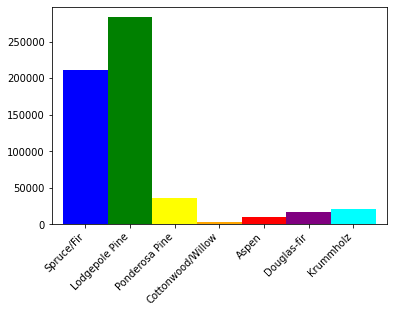

In [8]:
data = cover_df['Cover_Type'].value_counts().sort_index()
clr = ['blue', 'green', 'yellow', 'orange', 'red', 'purple', 'aqua']
labels = ['Spruce/Fir',
          'Lodgepole Pine',
          'Ponderosa Pine',
          'Cottonwood/Willow',
          'Aspen',
          'Douglas-fir',
          'Krummholz']
ax = data.plot(kind='bar', width=1, color=clr)
ax.set_xticklabels(labels, rotation=45);
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

As shown, the majority of tree cover in the dataset is the Spruce/Fir and the Lodgepole Pine. In addition, we can see there is quite a bit of scarcity in some labels such as Cottonwood/Willow which may become a problem later on. Because of this, I will have to be very careful on how we select data in order to get a good representation of each category when training/testing the model.

#### Outliers

We will next look at outliers in the data. For this, we will only be observing non-categorical data. This is done by checking which datapoints contain values outside a set range based on the inter-quartile range (IQR)$^{[5]}$$^{[6]}$: 

For values outside an "inner fence" (any mild outliers in the observed dataset):
$$x > Q_3 + 1.5*IQR \text{ || } x < Q_1 - 1.5*IQR$$
For values outside an "outer fence" (any extreme outliers in the observed dataset):
$$x > Q_3 + 3*IQR \text{ || } x < Q_1 - 3*IQR$$


These outliers can be found using the following method:

In [9]:
def find_outlier(df, col, inner_outer = 'inner', verbose = True):
    if verbose:
        print(col + ': ')
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    inner = df[(df[col] > Q3 + 1.5*IQR) | (df[col] < Q1 - 1.5*IQR)]
    if verbose:
        print(f' {len(inner)} values outside inner fence.')
    outer = df[(df[col] > Q3 + 3*IQR) | (df[col] < Q1 - 3*IQR)]
    if verbose:
        print(f' {len(outer)} values outside outer fence.')
    if inner_outer == 'outer':
        return list(outer.index)
    return list(inner.index)

cont_feat = ['Elevation',
         'Aspect',
         'Slope',
         'Horizontal_Distance_To_Hydrology',
         'Vertical_Distance_To_Hydrology',
         'Horizontal_Distance_To_Roadways',
         'Hillshade_9am',
         'Hillshade_Noon',
         'Hillshade_3pm',
         'Horizontal_Distance_To_Fire_Points']
idx_i = []
idx_o = []
for col in cont_feat:
    idx_i += find_outlier(cover_df, col)
    idx_o += find_outlier(cover_df, col, 'outer', False)


Elevation: 
 15569 values outside inner fence.
 0 values outside outer fence.
Aspect: 
 0 values outside inner fence.
 0 values outside outer fence.
Slope: 
 15316 values outside inner fence.
 275 values outside outer fence.
Horizontal_Distance_To_Hydrology: 
 14557 values outside inner fence.
 414 values outside outer fence.
Vertical_Distance_To_Hydrology: 
 31463 values outside inner fence.
 5339 values outside outer fence.
Horizontal_Distance_To_Roadways: 
 669 values outside inner fence.
 0 values outside outer fence.
Hillshade_9am: 
 17433 values outside inner fence.
 1027 values outside outer fence.
Hillshade_Noon: 
 15672 values outside inner fence.
 1191 values outside outer fence.
Hillshade_3pm: 
 7832 values outside inner fence.
 0 values outside outer fence.
Horizontal_Distance_To_Fire_Points: 
 31157 values outside inner fence.
 10 values outside outer fence.


So if we remove all outliers outside the inner fence, we will remove much more data from our dataframe:

In [10]:
len(set(idx_i))

108339

This may remove too much data and reduce how well the dataset represents the real data.

We can also remove extreme outliers. The number of datapoints removed in this instance will be:

In [11]:
len(set(idx_o))

7679

This may be too little and might result in too varied of data, which would affect model performance.

Alternatively, we can also replace any outlier data with the threshold value itself, which would retain the amount of datapoints we are using:

$$\begin{cases}x = Q_3 + 1.5*IQR& \text{ if } x > Q_3 + 1.5*IQR \\ x = Q_1 - 1.5*IQR& \text{ if } x < Q_1 - 1.5*IQR\end{cases}$$

For now, this will be the approach I will use, as it will avoid any extra scarcity problems within a dataset that already contains quite a bit of scarcity (as described in the previous section with Cottonwood/Willow labels). However, this may change depending on how the final model performs. The following code will replace the outlier values:

In [12]:
def replace_outliers(df, feats):
    for col in feats:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.75)
        IQR = Q3 - Q1
        upper = Q3 + 1.5*IQR
        lower = Q1 - 1.5*IQR
        df.loc[(df[col] < lower), col] = lower
        df.loc[(df[col] > upper), col] = upper

We can visualize our transformed data by using box and whisker plots. The folloowing figure shows our features without outlier manipulation:

Text(0.5, 1.0, 'Boxplot: Continuous Data')

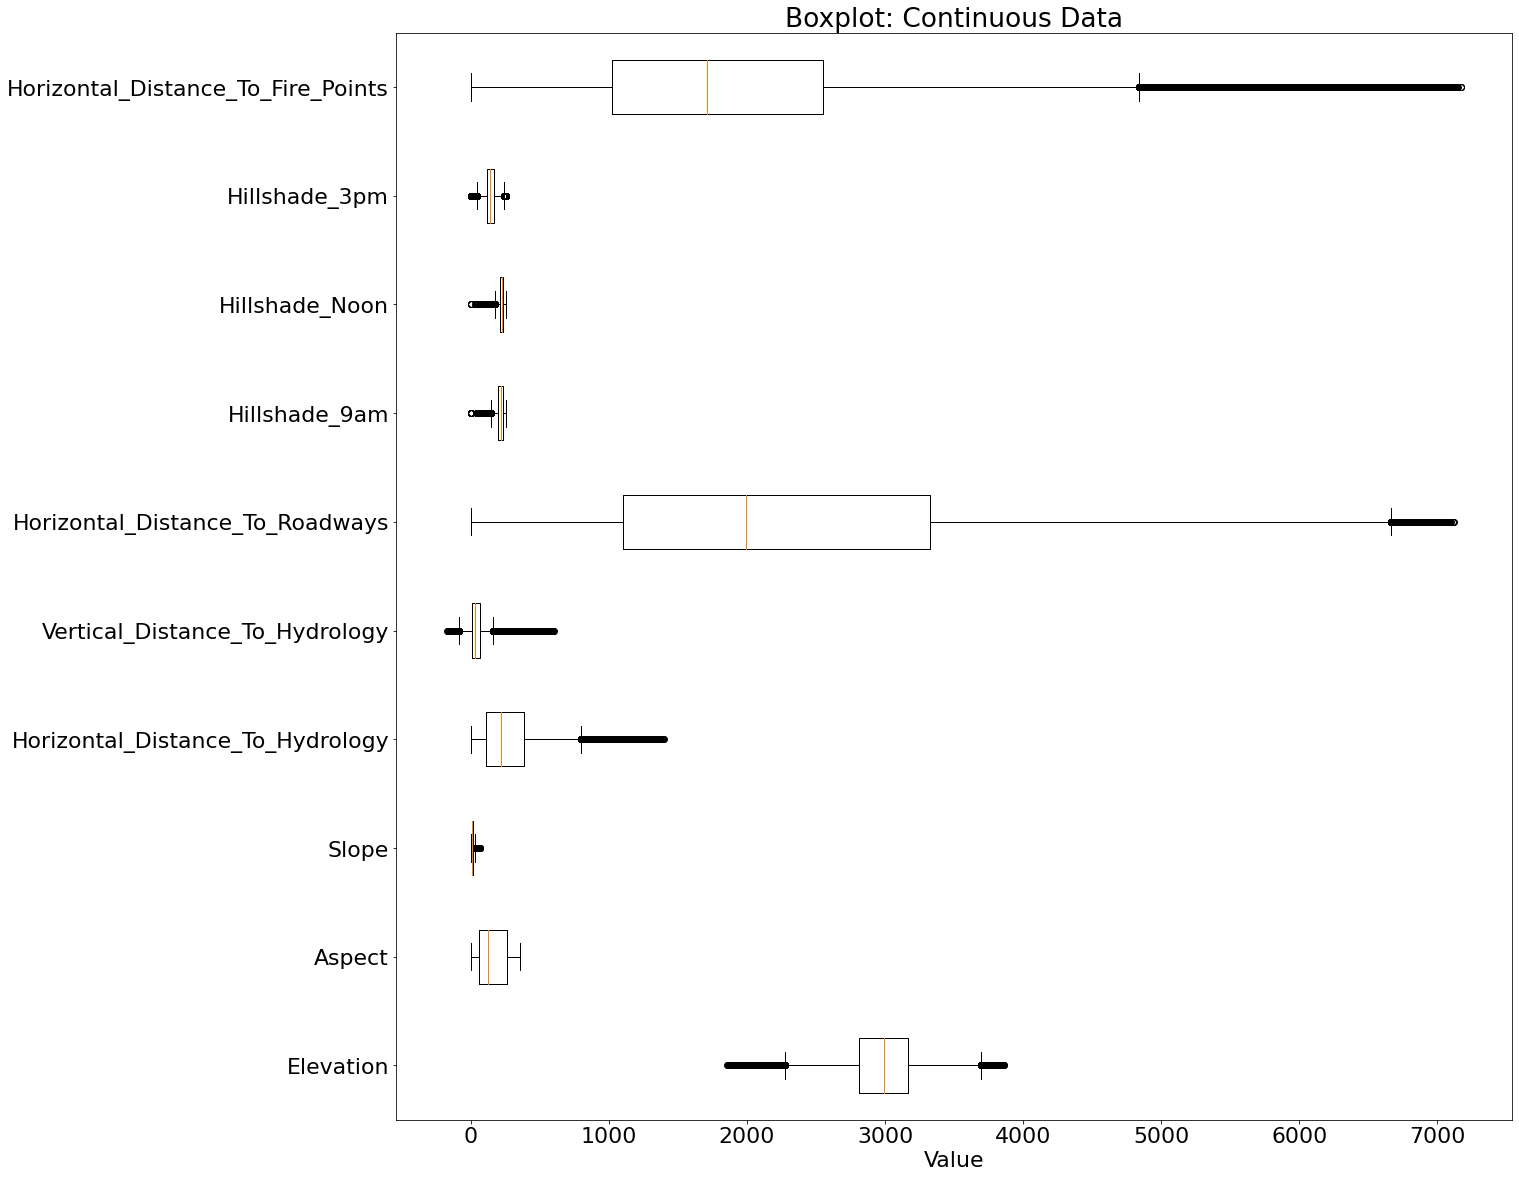

In [13]:
plt.figure(figsize=(20, 20))
font = {'size'   : 22}
plt.rc('font', **font)
plt.boxplot(cover_df[cont_feat], vert=False, labels=cover_df[cont_feat].columns)
plt.xlabel("Value")
plt.title('Boxplot: Continuous Data')

From the figure above, we can see all outliers in each feature (represented as black points). The following figure shows how the features look with manipulation:

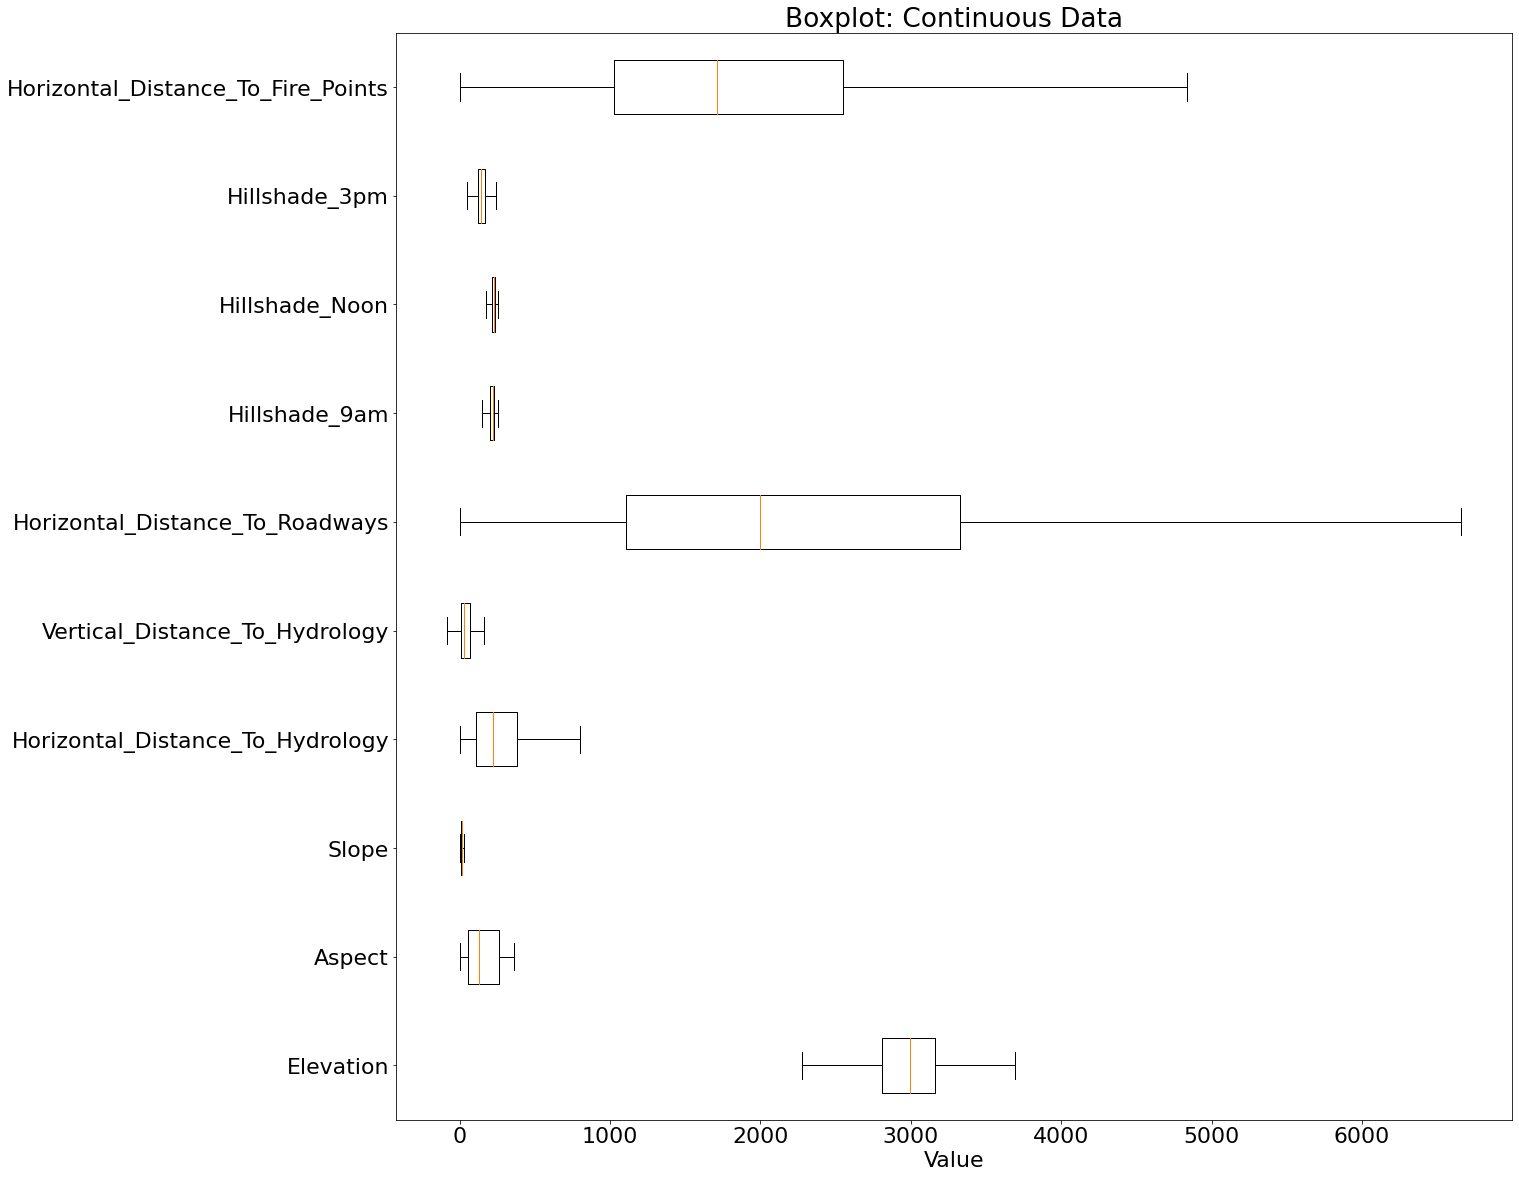

In [14]:
replace_outliers(cover_df, cont_feat)
plt.figure(figsize=(20, 20))
plt.boxplot(cover_df[cont_feat], vert=False, labels=cover_df[cont_feat].columns)
plt.xlabel("Value")
plt.title('Boxplot: Continuous Data')
font = {'size'   : 22}
plt.rc('font', **font)

As shown by the above figure, all outliers are gone.

#### Observing non-categorical data distribution

Now lets look at the distribution of each non-categorical feature:

..........

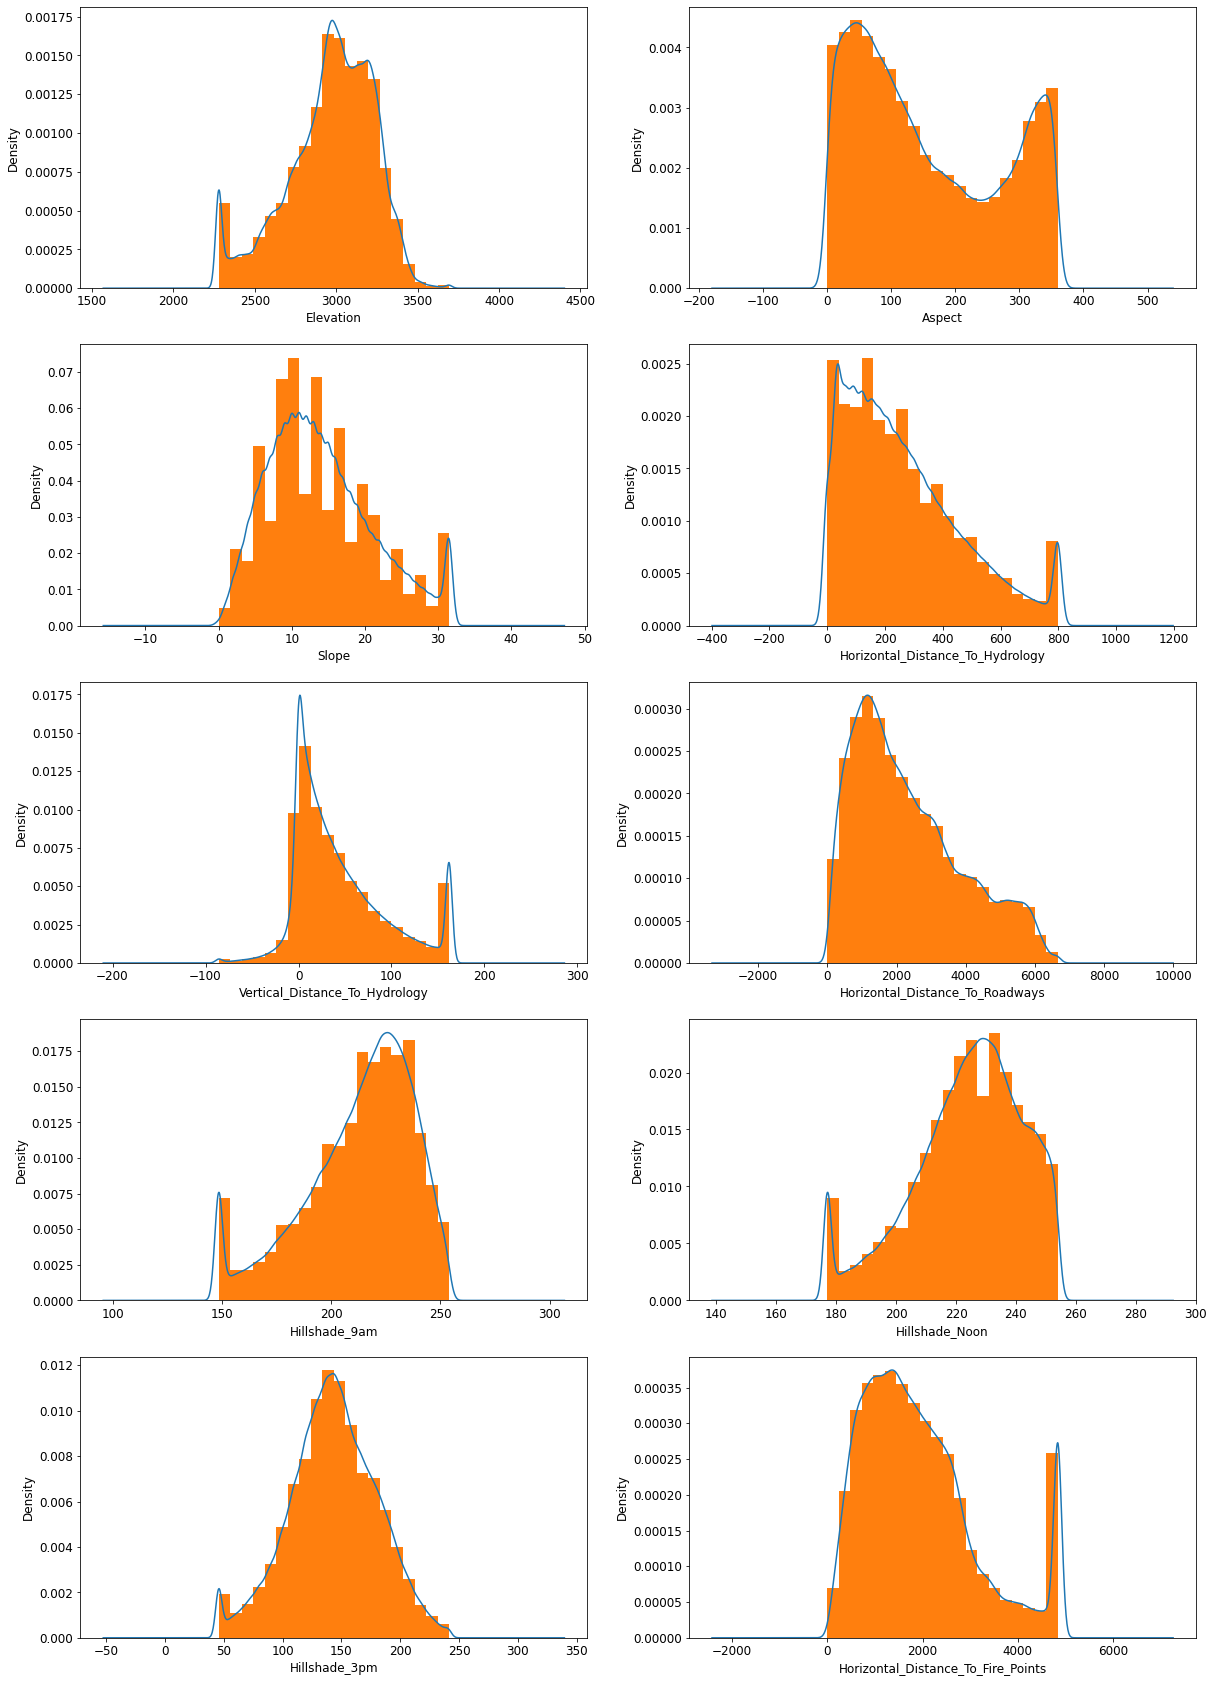

In [15]:
# This takes a REALLY long time
col = ['Elevation',
       'Aspect',
       'Slope',
       'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways',
       'Hillshade_9am',
       'Hillshade_Noon',
       'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']
fig = plt.figure(figsize=(20, 30))
font = {'size'   : 12}
plt.rc('font', **font)
# fig, axs = plt.subplots(2, 5)
n = 0
for i in range(10):  
    ax = fig.add_subplot(5, 2, i+1)
    cover_df[col[i]].plot.kde()
    plt.hist(cover_df[col[i]], density=True, bins = 20)
    ax.set_xlabel(col[i])
    print('.', end='') # visual feedback to know progress

As shown, we can see a few features show a fairly normal distribution: Elevation, Slope, and Hillshade_3pm. There are also quite a few that are close to normal, but have a slight skew in data: Horizontal_Distance_To_Hydrology, Hillshade_9am, Hillshade_Noon, and Horizonta_Distance_To_Fire_Points. The only feature that has a drastically different distribution is Aspect, which seems to have a bimodal-shaped distribution and Vertical_Distance_To_Hydrology, which appears to be exponential. In addition, we can see that the values of the features are very different from one-another: for example, Aspect has a range between 0 and 350 while Elevation has a range of about 2250 to 3750. I will have to normalize these features to effectively use them in my model. To do that, I will use the following normalization function:

$$\frac{X-\mu}{\sigma}$$

In [16]:
for feat in col:
    cover_df[feat] = (cover_df[feat]-cover_df[feat].mean())/cover_df[feat].std()

..........

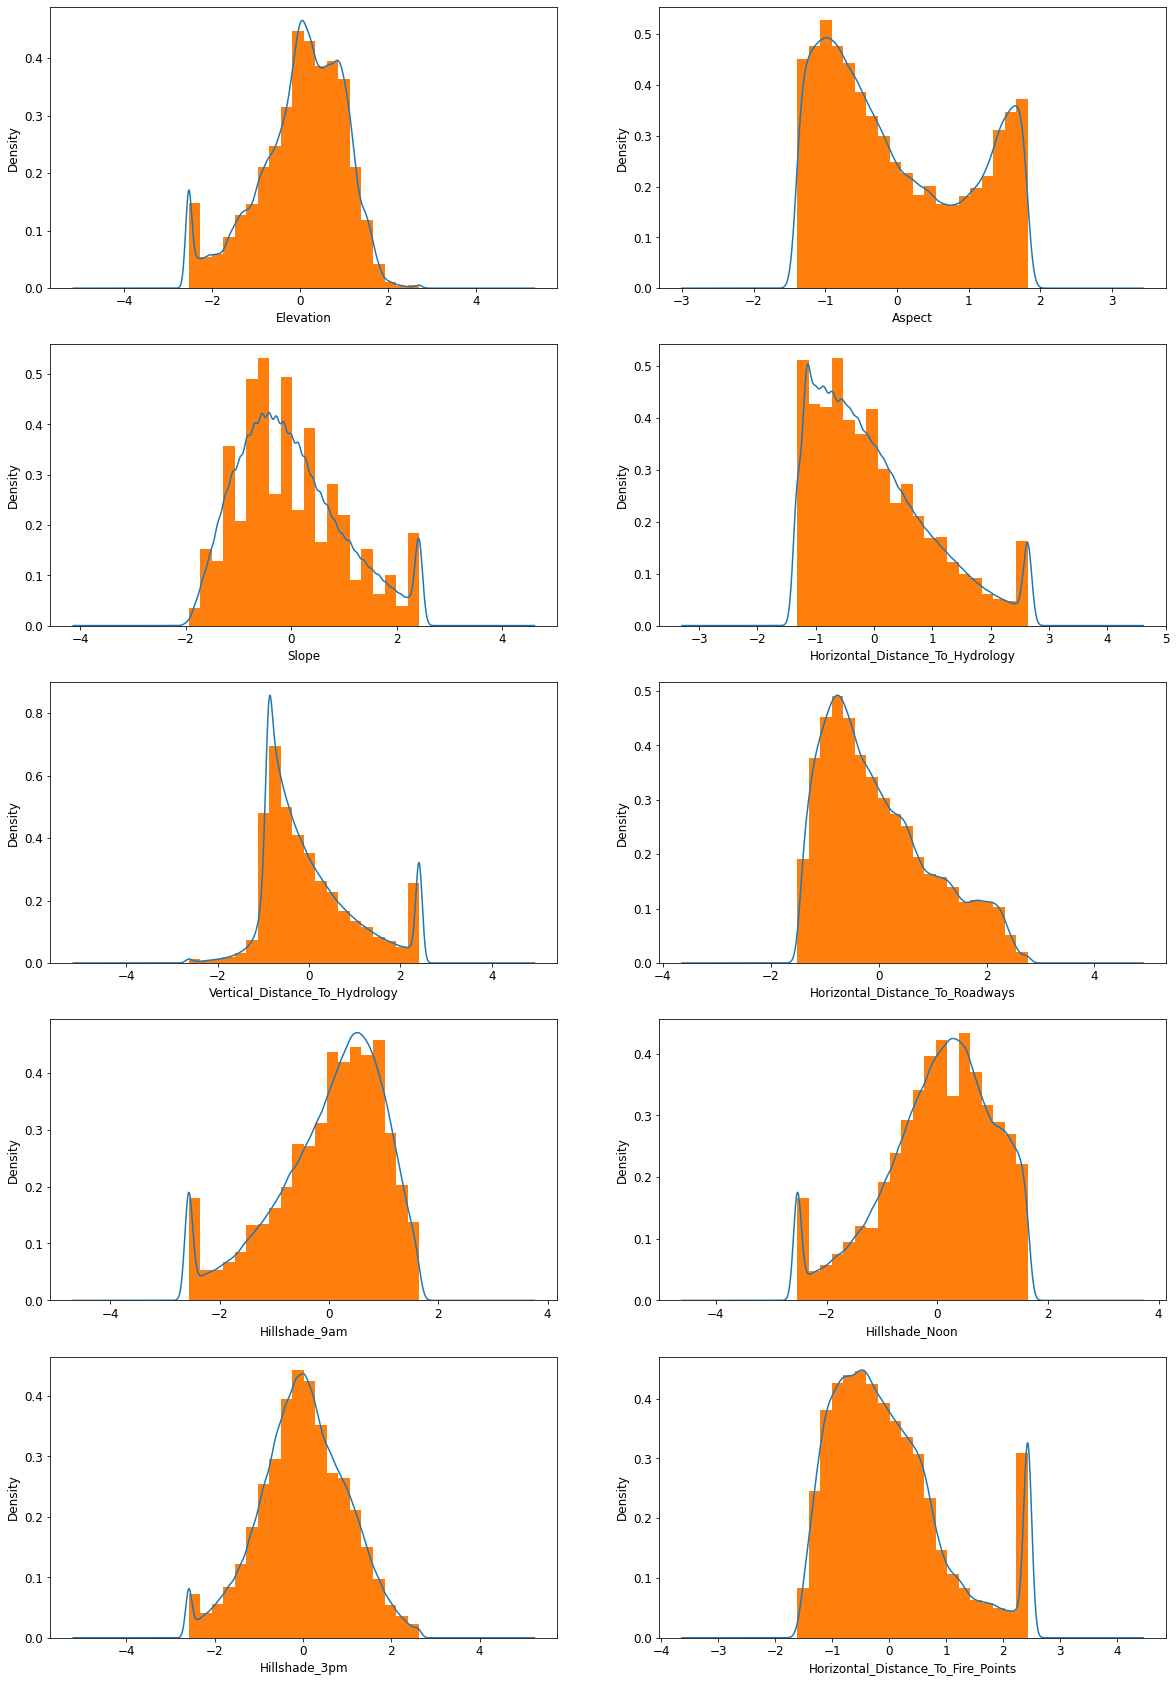

In [17]:
# This takes a REALLY long time
fig = plt.figure(figsize=(20, 30))
# fig, axs = plt.subplots(2, 5)
n = 0
for i in range(10):  
    ax = fig.add_subplot(5, 2, i+1)
    cover_df[col[i]].plot.kde()
    plt.hist(cover_df[col[i]], density=True, bins = 20)
    ax.set_xlabel(col[i])
    print('.', end='') # visual feedback to know progress

Finally, let's look at the correlation matrix:

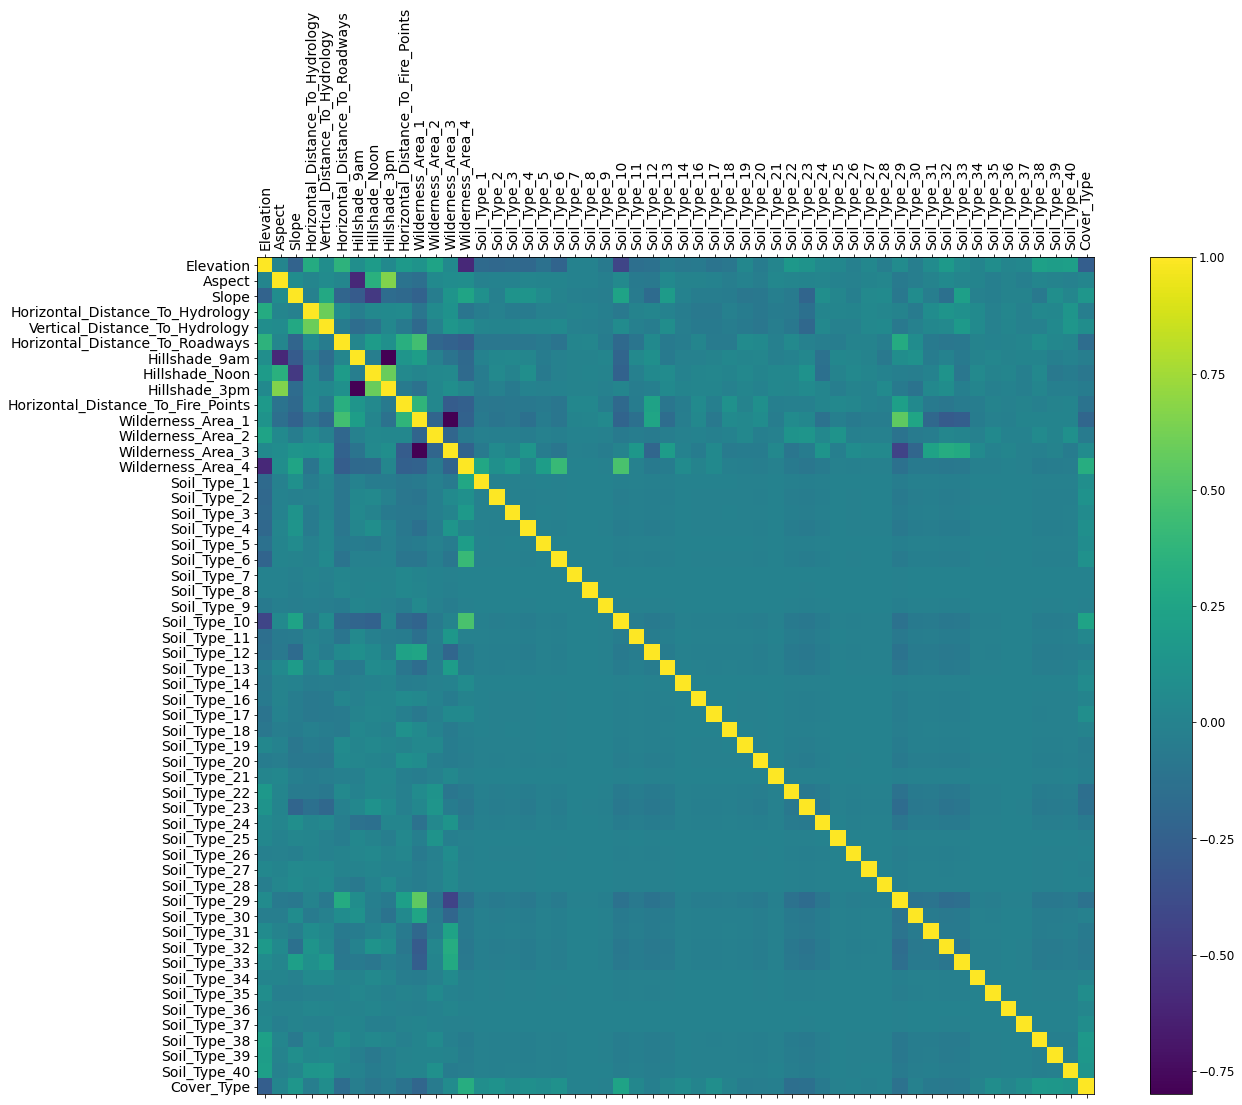

In [18]:
fig = plt.figure(figsize=(20, 15))
plt.matshow(cover_df.corr(), fignum=fig)
plt.xticks(range(cover_df.shape[1]), cover_df.columns, fontsize=14, rotation=90)
plt.yticks(range(cover_df.shape[1]), cover_df.columns, fontsize=14)
plt.colorbar();

We can see from the correlation plot that the groups Hillshade and Wilderness_Area are fairly correlated in their own group respectively. The soil types remain pretty uncorrelated. From the figure, most of the soil features seem fairly uncorrelated with each other and more seems to be happening with the other features. In addition, it is difficult to pinpoint any highly correlated features with so many presented on one figure. So to get a better look at the other correlation values, we can exclude them:

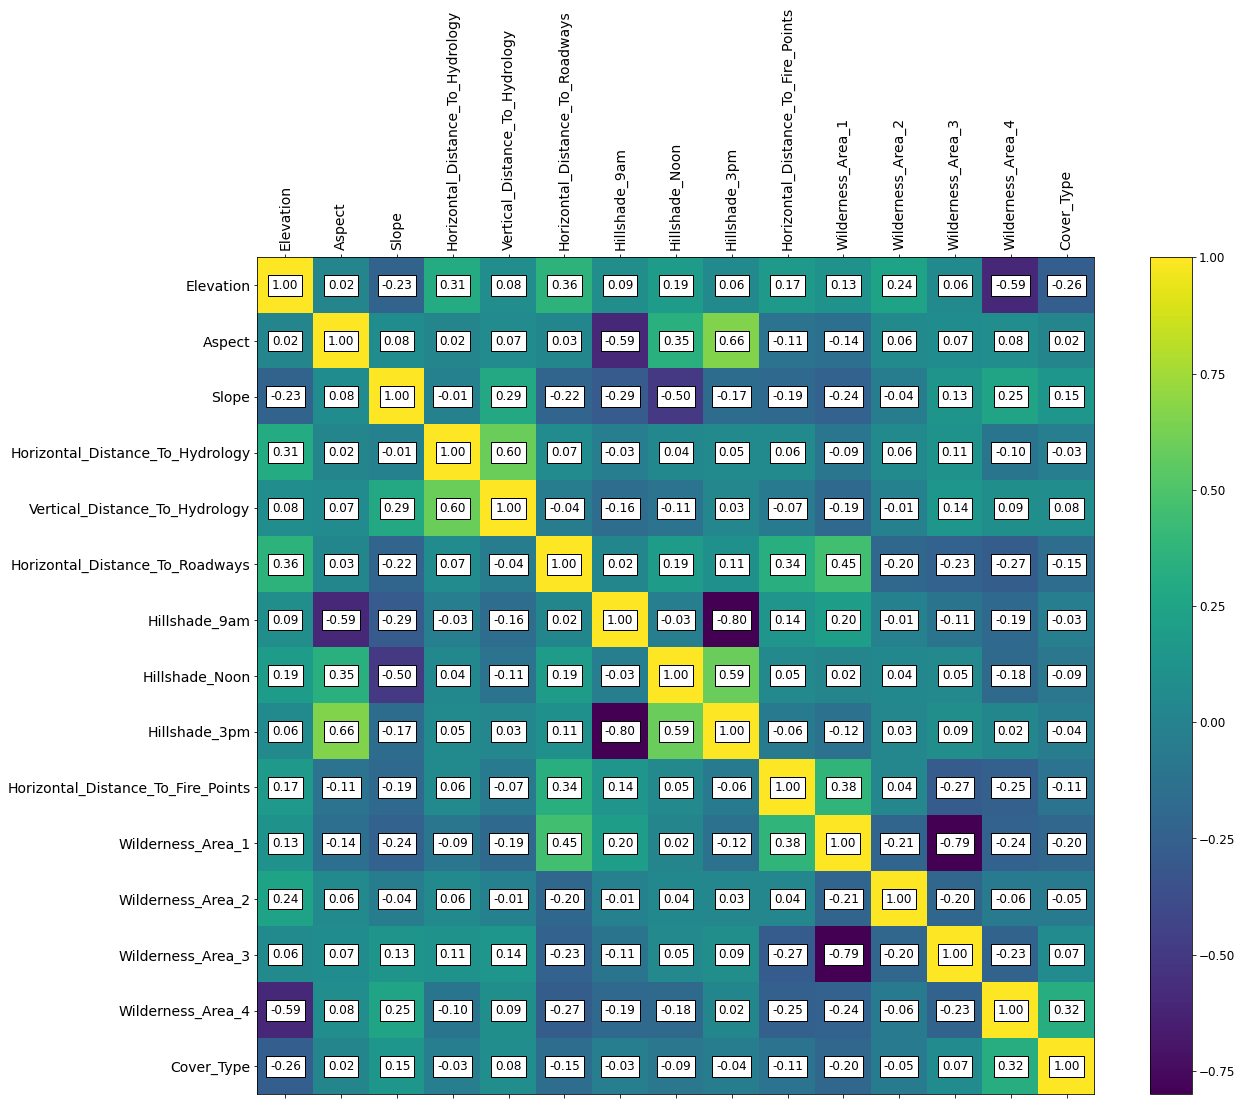

In [19]:
fig = plt.figure(figsize=(20, 15))
feats_no_soil = [i for i in cover_df.columns if 'Soil' not in i]
plt.matshow(cover_df[feats_no_soil].corr(), fignum=fig,)
# text style taken from
# https://stackoverflow.com/questions/20998083/show-the-values-in-the-grid-using-matplotlib:
for (x, y), value in np.ndenumerate(cover_df[feats_no_soil].corr()):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center", bbox=dict(facecolor='white'))
plt.xticks(range(cover_df[feats_no_soil].shape[1]), cover_df[feats_no_soil].columns, fontsize=14, rotation=90)
plt.yticks(range(cover_df[feats_no_soil].shape[1]), cover_df[feats_no_soil].columns, fontsize=14)
plt.colorbar();

Correlation values (absolute) between 0.8-1.0 are considered strong, 0.6-0.8 are considered moderately strong, 0.4-0.6 are considered moderate, 0.2-0.4 are considered mild, and 0.0-0.2 are considered weak.$^{[7]}$ From the visualization above, we can see that there is a strong correlation between Hillshade_9am and Hillshade_3pm (-0.80), and a moderately strong correlation between Wilderness_Area_3 and Wilderness_Area_1 (0.79) and between Aspect and Hillshade_3pm(0.66). It might be a good idea to remove some of these features - specifically Hillshade_3pm.

We can further look into correlation, and give a possible estimate of what important features are, by looking at the correlation values between our target feature and the rest of the features, in order to get a better idea of how much they will affect the model prediction:

In [20]:
corr = {}
for feat in cover_df.columns:
    corr[feat] = cover_df["Cover_Type"].corr(cover_df[feat])
sorted(corr.items(), key=lambda x: abs(x[1]), reverse=True)

[('Cover_Type', 1.0),
 ('Wilderness_Area_4', 0.32319955390915706),
 ('Elevation', -0.26398081545931273),
 ('Soil_Type_10', 0.2438763015279522),
 ('Wilderness_Area_1', -0.20391321381925523),
 ('Soil_Type_38', 0.16016960859426618),
 ('Soil_Type_39', 0.15566826086668722),
 ('Horizontal_Distance_To_Roadways', -0.15349544550352903),
 ('Slope', 0.1470997022635832),
 ('Soil_Type_22', -0.14174611949946536),
 ('Soil_Type_23', -0.13505517100440392),
 ('Soil_Type_40', 0.1283512997877075),
 ('Soil_Type_29', -0.12493259757283058),
 ('Soil_Type_2', 0.11813526031668564),
 ('Horizontal_Distance_To_Fire_Points', -0.11307258101299258),
 ('Soil_Type_6', 0.1129582780721208),
 ('Soil_Type_4', 0.09967186439491378),
 ('Soil_Type_1', 0.0908281521174632),
 ('Soil_Type_17', 0.09058230355856745),
 ('Hillshade_Noon', -0.0888273164179976),
 ('Vertical_Distance_To_Hydrology', 0.08344788374627242),
 ('Soil_Type_35', 0.08031505015427362),
 ('Soil_Type_37', 0.08027147359470993),
 ('Soil_Type_5', 0.07788996111809236),


The highest correlation were Wilderness_Area_4, Elevation, and Soil_Type_10. None of these features are above a "mild" correlation. It is difficult to say now, but I believe the most important features for the model will be Wilderness Area, some certain types of soil, and elevation.

For modeling purposes, it may also be beneficial to use the Variance Inflation Factor (VIF) to find any variables that are collinear.$^{[12][13]}$ The VIF for the $j^{th}$ variable is:

$$VIF_j = \frac{1}{1-R_j^2}$$

A VIF above a factor above 5 suggests the variable exhibits colinearity and should be excluded in machine learning models with an assumption of no collinearity. Based on the correlation analysis, we may see a high VIF in one or more of the variables described above. Again, we are not going to use categorical data as VIF is based on $R^2$ value.

In [21]:
vif = [VIF(cover_df[cont_feat].values, i) for i in range(cover_df[cont_feat].shape[1])]
print('Feature | VIF')
for feat, v in zip(cont_feat, vif):
    print(f'{feat} | {v}')

Feature | VIF
Elevation | 1.3259085286697252
Aspect | 1.8972272918025412
Slope | 2.997784838062323
Horizontal_Distance_To_Hydrology | 1.7917408258991185
Vertical_Distance_To_Hydrology | 1.8118033730424414
Horizontal_Distance_To_Roadways | 1.3025518441126969
Hillshade_9am | 35.370072846386606
Hillshade_Noon | 13.11490385425723
Hillshade_3pm | 49.25687835781997
Horizontal_Distance_To_Fire_Points | 1.1748716754600912


As suspected from the correlation analysis, Hillshade_3PM is very collinear, and may also be bringing the VIF of the other Hillshade variables up. Deleting this entry and running again gives:

In [22]:
cover_df.drop("Hillshade_3pm", axis=1, inplace=True)

In [23]:
noncl_feat = cont_feat
noncl_feat.remove("Hillshade_3pm")
vif = [VIF(cover_df[noncl_feat].values, i) for i in range(cover_df[noncl_feat].shape[1])]
print('Feature | VIF')
for feat, v in zip(noncl_feat, vif):
    print(f'{feat} | {v}')

Feature | VIF
Elevation | 1.3248505788752172
Aspect | 1.888620434745744
Slope | 1.7242841940540443
Horizontal_Distance_To_Hydrology | 1.7917251233354572
Vertical_Distance_To_Hydrology | 1.8116373904016998
Horizontal_Distance_To_Roadways | 1.3016252570347349
Hillshade_9am | 1.7239929164607142
Hillshade_Noon | 1.69507116594852
Horizontal_Distance_To_Fire_Points | 1.172909533918361


Deleting this variable makes every VIF value below 5. 

#### EDA Discussion

From our analysis, we were able to determine that there were no missing or duplicated data in our dataset. We were able to observe our feature values and able to remove a feature that had too few data (Soil_Type_15). We were also able to look at the target dataset and observe scarcity of some of the labels - this might need to be taken into account when building our model. We were then able to look over outliers for the dataset. From the calculations, we were able to determine which values were outliers, and we were able to cap/floor those values to remove those outliers while also preventing a worse affect on the scarcity of our dataset. We were then able to look at the distribution of some of our continuous features and able to see which features may be skewed. We were able to normalize these features for our model. We then looked at correlation values and determined which values may be too correlated with each other. We then looked closer at the correlation with the target feature and observed which values may have the most effect. Wilderness_Area_4 and Elevation had the highest absolute correlation with our target feature and may affect the target feature the most when modeling. Further VIF analysis confirmed our suspicion with the correlation analysis, prompting the removal of Hillshade_3pm. The most difficult aspect of this project may be the unbalanced target feature and dealing with scarcity. Getting a good representation for all categories will be important when training/testing and there is not that many datapoints for some tree cover categories. 

---

## Model

In [24]:
# Libraries for modeling:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler

#### Model Brainstorming:

For model selection, we will focuss on categorical methods only. Since our target is non-binary (has more than two categories), we need to consider using only models which can do multiclass approaches.

Multinominal regression may be a model to consider. This is a multi-class logistic regression method which has a linear function for each class.

For non-parametric models, we can use is KNN and train our model for optimal value of k. This might be good because we have multiple classes to model and knn is generally a good model to use. The problem I might face with this model is the curse of dimmensionality. I have many features in my dataset and so I may need to further reduce these in order to achieve a good model. Another model I can use is a tree method. Both random forest and boosted decision trees can prove to be good for multi-variable, multiclass models. Some of the problems with decision trees is that they sometimes tend to overfit the data when there are a large number of features present. In addition, decision trees have many different parameters to change: tree depth, tree splitting, samples in a leaf, how a tree prunes, etc. which may take a longer amount of time to train.$^{[8]}$

Some things to consider is that we need to train our models to have an optimal complexity. This means we need to balance our bias/variance for minimum validation error by selecting the optimal parameters (k for knn, tree depth for decision trees)

Another big issue to consider is how unbalanced my data is. This may pose a problem when I am trying to train my model. There are a few resources which suggest different methods, such as oversampling and undersampling (https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/). This might be the hardest aspect of creating my model.

### Multinominal Logistic Regression

Multinominal logistic regression is a generalization of logistic regression for problems which have multiple classes.$^{[9]}$ This is potentially a good model, however, this model does have some assumptions which need to be considered:

1. Independence beteen variables
2. There is no multicollinearity between variables
3. There are no outliers
4. Linearity among variables

Through our analysis, we have already taken care of outliers. From correlation and VIF analysis, we were already able to identify a variable which would make the model non-collinear. Removing Hillshade_3PM means that there is no longer multicollinearity between variables. As stated before, we have very unbalanced tags with cottonwillow only having 2747 datapoints. To help alleviate this problem, we will oversample this tag for training data, meaning that we will duplicate samples from this tag in the training set randomly with replacement using the RandomOverSampler from the imblearn library (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html). Before this, we will split the data into training/testing sets  of 80/20 respectively using sklearn's train_test_split.

In [25]:
target = 'Cover_Type'
feats = list(cover_df.columns)
feats.remove(target)
# train test split
X_train, X_test, y_train, y_test = train_test_split(cover_df[feats], cover_df[target], test_size=0.2, random_state=123)
print(f'Before oversampling: {dict(y_train.value_counts())}')
# oversampling
oversamp = RandomOverSampler(sampling_strategy='minority')
X_trainos, y_trainos = oversamp.fit_resample(X_train, y_train)
print(f'After oversampling: {dict(y_train.value_counts())}')

Before oversampling: {2: 226569, 1: 169507, 3: 28696, 7: 16403, 6: 13864, 5: 7618, 4: 2152}
After oversampling: {2: 226569, 1: 169507, 3: 28696, 7: 16403, 6: 13864, 5: 7618, 4: 2152}


In [26]:
# Fit to Logistic model
model = LogisticRegression(solver='sag', n_jobs=-1, max_iter=100)
lr = model.fit(X_trainos, y_trainos)

In [27]:
lr_train_score = lr.score(X_trainos, y_trainos)
lr_test_score = lr.score(X_test, y_test)
print("Training Score:", lr_train_score)
print("Test Score:", lr_test_score)

Training Score: 0.8009781987330716
Test Score: 0.7095944166673838


The performance of this is not great. The accuracy is not very good (about 0.7). In addition, it took multiple attempts to converge. The reason for this is there may not be linearity among the variables. This might cause a failure to converge and, as a result, a bad score. Another reason might be that our data is too unbalanced. Although, this would most likely still let us converge.

### KNN

KNN is a non-parametric method which takes into consideration the euclidean distances of neighboring values. The tuning parameter is K, where K is the number of neighboring values to consider. Based on the closest K neighbors, the model will take a poll and the most common tag will be voted for. There is no training step for this process. The KNN algorithm is a lazy algorithm which will look at each datapoint. K will affect the bias/variance tradeoff. A small K will have a higher complexity and as a result, have a higher variance. A larger K will have a lower variance. We will be using a K of 5 (the default value).$^{[20]}$

In [28]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
kmodel = knn.fit(X_train, y_train)

In [29]:
knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)
print("Training Score:", knn_train_score)
print("Test Score:", knn_test_score)

Training Score: 0.9573738890598074
Test Score: 0.9307418913453182


This model performed a lot better than the Logistic Regression model. We did not have to worry about convergence for this model. For a K of 5 (sklearn's default value), the accuracy was about 0.93. Unfortunately, this method also took a very long time to caluclate (4 hours) and, as such, it was unrealistic to further tune the hyperparameter. This time makes sense as KNN is a lazy algorithm and will perform it's calculations slowly. Since we are dealing with a very large dataset, this will take a very long time to perform.

### Random Forest

Random Forest (RF) is a non-parametric ensemble method which constructs many deep decision trees (which, as a result each overfit the data and therefore have a high varinace/low bias), and then ensembles them into a larger model (which will reduce the overall variance). Random forests use a technique during fitting called bagging (bootstrap aggregating). This is where each tree takes sample data using random sampling with replacement. Doing this repeatedly improves the model's overall accuracy. For classification, each created tree in the ensembled model will choose a class and a majority vote is taken.$^{[14]}$

A big benefit for using RF is that it handels high dimensional data well. It also has a reduced risk of overfitting due to its bagging implementation. One of the problems with this method is that it tends to have a longer training time than a Decision tree method.$^{[16]}$

There are multiple hyperparameters in RF that need to be tuned:

   * Number of trees (n_estimators)
   * Number of attributes selected during a tree split when creating a tree (max_features)
   * Tree depth (max_depth)
   
Due to this, I will be using a random search. Random search is similar to grid search, but it will choose hyperpareter combinations in a random order. This randomness is supposed to be theoretically more efficient for hyperparameter tuning than grid search.$^{[17]}$. The following ranges of hyperparameters will be tested:

In [30]:
gridsearch = {'n_estimators': [100, 200, 500], # Number of trees in forest (Default: 100)
              'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider (Default: auto)
              'max_depth': [None, 1, 10, 20, 30, 50], # Maximum depth of a tree (Default: None)
              'min_samples_split': [2, 5, 10], # Minimum samples required to split a node (Default: 1)
              'bootstrap': [True, False] # If we are using bootstrap or not (Default: True)
             }

We will be using sklearn's RandomizedSearchCV, which will also alow us to implement cross-validation. Cross validation is a technique used to validate the training set during fitting. It divides the dataset into "folds" (subsets) and on each iteration chooses one of the folds to act as a validator. This is a good option to use to help prevent overfitting while also getting rid of the need to have a dedicated validation set.$^{[18]}$ We will use a cv of 4 meaning there are 4 folds in our training dataset. In addition to this, we will set class_weight to "balanced" meaning that the algorithm will automatically adjust for class frequency, meaning we dont need to worry about oversampling like in logistic regression.

In [31]:
rfc = RandomForestClassifier(class_weight='balanced')
rf_gs = RandomizedSearchCV(estimator = rfc,
                           param_distributions = gridsearch,
                           cv = 4,
                           verbose=1,
                           random_state=123,
                           n_jobs = -1)
rf_gs.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/home/dcshack/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 1, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=123, verbose=1)

Based on the random search, the best parameters to use are:

In [32]:
rf_gs.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [33]:
rf_train_score = rf_gs.score(X_train,y_train)
rf_test_score = rf_gs.score(X_test,y_test)
print("Training Score:", rf_train_score)
print("Test Score:", rf_test_score)

Training Score: 1.0
Test Score: 0.9580733715997005


As shown, the RF performed much better than the Logistic Regression model for our dataset. On top of that, RF performed faster than the KNN while also performing about the same. This allowed us to fully tune hyperparameters and implement cross-validation without having an unreasonibly long computation time. Comparisson of the models can be shown below:

In [34]:
data = [["LR", lr_train_score, lr_test_score],
        ["KNN", knn_train_score, knn_test_score],
        ["RF", rf_train_score, rf_test_score]]
scores = pd.DataFrame(data, columns=["Model", "Training Accuracy", "Testing Accuracy"])
scores

,Model,Training Accuracy,Testing Accuracy
0,LR,0.800978,0.709594
1,KNN,0.957374,0.930742
2,RF,1.000000,0.958073


Based on this result, we will further look into RF.

In [35]:
y_pred = rf_gs.predict(X_test)

We can see the confusion matrix of actual vs. predicted below

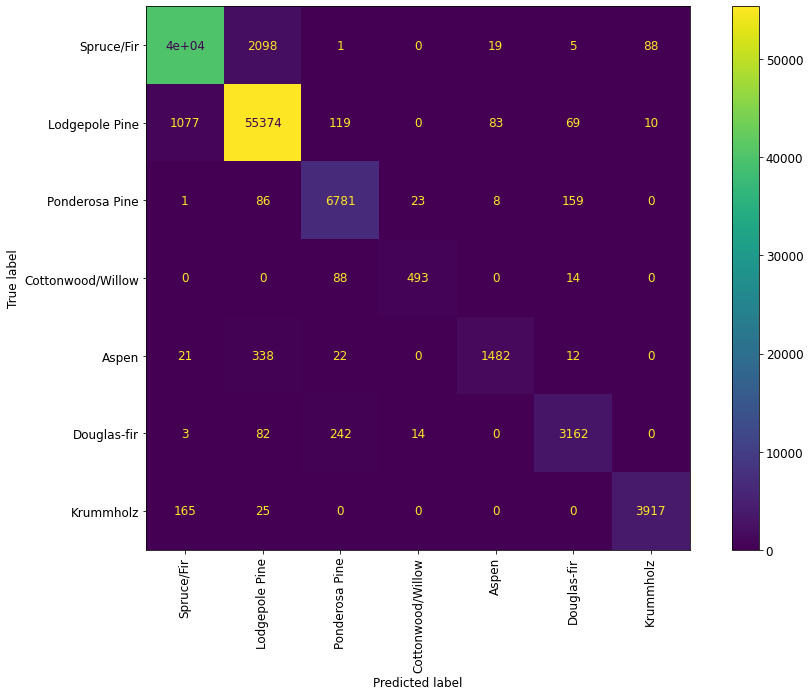

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
cm = confusion_matrix(y_test, y_pred, labels=rf_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot(ax=ax, xticks_rotation=90);

From the confusion matrix, we can see that, comparatively, we had very few false positives and negatives. The most falsely predicted values were on Spruce/Fir and Lodgepole Pines, but that makes sense due to them having a higher precentage of the values. To better see this, we can look at the precision and recall below.

In [37]:
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96     42333
           2       0.95      0.98      0.97     56732
           3       0.93      0.96      0.95      7058
           4       0.93      0.83      0.88       595
           5       0.93      0.79      0.85      1875
           6       0.92      0.90      0.91      3503
           7       0.98      0.95      0.96      4107

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



As shown, precision (which is defined as $\frac{t_p}{t_p+f_p}$) and recall (which is defined as $\frac{t_p}{t_p +f_n}$) are high for all classes. The only class that has a low recall is class 5 which is for Aspen. This means Aspens have high false negatives. This may be due to either the imbalance (Aspen is the second to lowest populated class) or may be the result of the hyperparameters. Shown in the classification report is also the f1-score. The f1-score is defined as $\frac{precision*recall}{precision+recall}$ and is a combined statistic to measure performance. This score may give insights to class imbalance as f1 is very affected by an imbalance class. Like recall, we can see that there is a slightly lower value for the lower populated classes meaning that imbalance may have affected the score slightly. However, the f-score is still at least 0.85 which is very good.

A benefit for using RF is that it is suited well for feature importance. We'll implement permutation feature importance as detailed in sklearn's documentation$^{[19]}$

In [38]:
rf_best = rf_gs.best_estimator_ # Get the best estimator in our randomsearch
result = permutation_importance(rf_gs, X_test, y_test,
                                n_repeats=3,
                                random_state=123) # Get feature ioportances
imp_feat = pd.Series(result.importances_mean, index=rf_best.feature_names_in_)

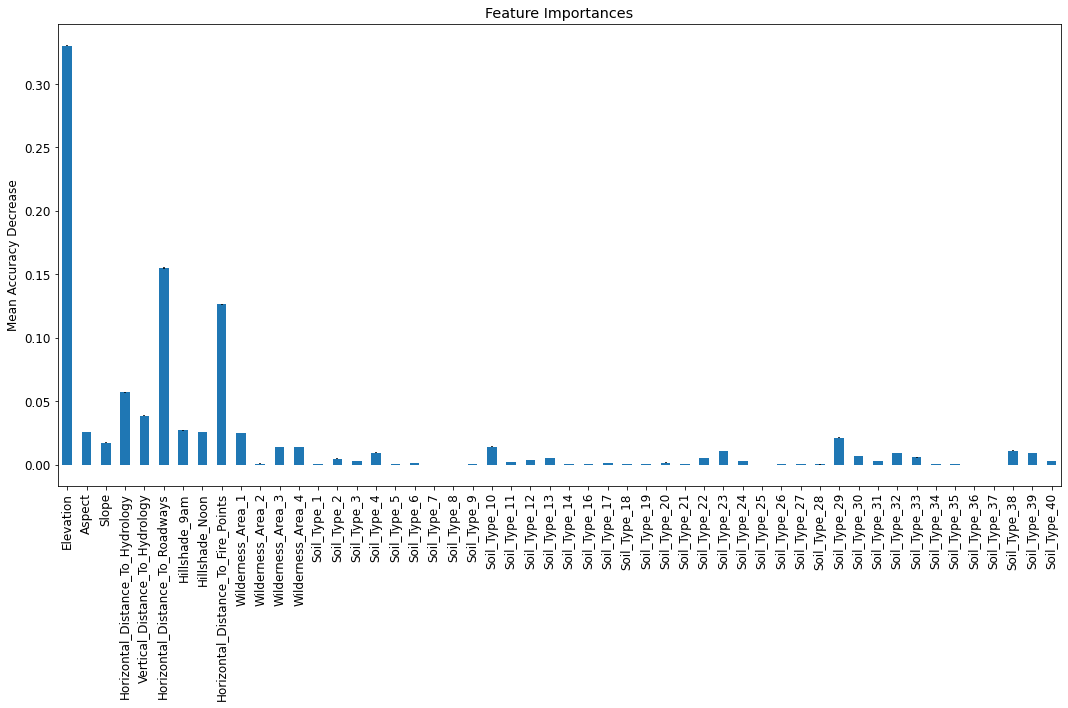

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
imp_feat.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Mean Accuracy Decrease")
fig.tight_layout()
plt.show()

As shown, the top 5 features for RF classification in decreasing order are Elevation, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points, Horizontal_Distance_To_Hydrology, and Vertical_Distance_To_Hydrology. Wilderness Area was surprisingly not a large factor with Wilderness_Area_2 (Neota Wilderness Area) having almost 0 affect despite having as many datapoints as Wilderness_Area_4. Soil types as a whole were the least important features. The highest importance for this feature was Soil_Type_29 (Como - Legault families complex, extremely stony) and Soil_Type_10 (Bullwark - Catamount families - Rock outcrop complex, rubbly)

### Conclusion

In all, 3 different models were analyzed: A multinominal logistic regression (LR) model, a k-nearest-neighbor (KNN) model, and a random forest (RF) model with cross-validation and hyperparameter tuning. The LR model performed the worst with a testing accuracy of about 0.70 and had a very difficult time converging. This may be due to the variables not having linearity. This problem wasn't seen in the other two models of this analysis because KNN and RF aren't dependent on linearity. The KNN at K=5 (the default value) had the second best test accuracy at about 0.93. However, further tuning analysis was not acheivable due to the nature of KNN. KNN is a lazy algorithm, therefore processing the 581012 observations with 54 features was not viable time-wise without having more powerful computational system. RF did as well as KNN with a testing accuracy of about 0.95, while also being a lot more efficient with its computation. Doing further analysis, it was found that the precision, recall, and f-score for RF were also very good accross the classes, and the confusion matrix showed very little false-positive and false-negative values. There was a slight decrease in recall and f1-score for classes 4 and 5 (CottonWood/Willow and Aspen, respectively) which may be attributed to the imbalance in the dataset. However, these reductions were insignificant with the recall only going down to 0.79 and the f1 score only going down to 0.85. From feature importance analysis, it was determined that the top 5 features were Elevation, Horizontal_To_Roadways, Horizontal_Distance_To_Fire_Points, Horizontal_Distance_To_Hydrology, and Vertical_Distance_To_Hydrology. This makes a lot of sense as things like Elevation, fires, amount of urban development, and closeness to water would be huge factors that affect plant and wildlife. Wilderness Area was surprisingly not a large factor with Wilderness_Area_2 (Neota Wilderness Area) having almost 0 affect. Most soils had almost 0 affect on the model with exception to Soil_Type_29 (Como - Legault families complex, extremely stony) and Soil_Type_10 (Bullwark - Catamount families - Rock outcrop complex, rubbly). Some further suggestions to potentially improve performance would be to implement PCA for recing dimensionality. Since we have many features with a large dataset, it might be beneficial to reduce our dimension by using PCA. Another suggestion would be to drop features that werent important in our model such as many of the Soil_Types. Doing both of these suggestions can potentially improve our results and recuce computation time. We can also implement a neural network. However, this might come at a cost of understanding for the model as neural networks are "black box" methods.

---

### Works Cited:

[1] https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.128.2475&rep=rep1&type=pdf


[2] https://www.satpalda.com/blogs/significance-of-land-use-land-cover-lulc-maps

[3] https://pro.arcgis.com/en/pro-app/2.8/tool-reference/3d-analyst/how-hillshade-works.htm

[4] https://pro.arcgis.com/en/pro-app/2.7/help/analysis/raster-functions/hillshade-function.htm

[5] https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

[6]  A Modern Introduction to Probability and Statistics by Dekking et al. 

[7] http://faculty.washington.edu/ddbrewer/s231/s231regr.htm

[8] https://scikit-learn.org/stable/modules/tree.html

[9] Greene, William H. (2012). Econometric Analysis (Seventh ed.). Boston: Pearson Education. pp. 803–806. 

[10] https://it.unt.edu/sites/default/files/mlr_jds_aug2011.pdf

[11] https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/homoscedasticity/

[12] https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

[13] https://online.stat.psu.edu/stat462/node/180/

[14] Hastie, Trevor; Tibshirani, Robert; Friedman, Jerome (2008). The Elements of Statistical Learning (2nd ed.). Springer. ISBN 0-387-95284-5.

[15] https://www.ibm.com/cloud/learn/random-forest

[16] Probst, Philipp, Marvin N Wright, and Anne-Laure Boulesteix. 2019. “Hyperparameters and Tuning Strategies for Random Forest.” Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery. Wiley Online Library, e1301.

[17] James Bergstra, Yoshua Bengio (2012). Random Search for Hyper-Parameter Optimization 13(10):281−305 Journal of Machine Learning Research

[18] https://scikit-learn.org/stable/modules/cross_validation.html

[19] https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

[20] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html